# 1 Part A: Implementing Convolutional Neural Network from scratch.

## 1.1 Data Understanding, Analysis, Visualization and Cleaning

In [1]:
# Importing Libraries

import numpy as np
import matplotlib.pyplot as plt
import os
import random
import shutil
from sklearn.model_selection import train_test_split
from pathlib import Path
from PIL import Image

In [2]:
# Dataset path

path = 'data\\pest'

train_path = os.path.join(path, 'train')
test_path = os.path.join(path, 'test')
val_path = os.path.join(path, 'val')

In [3]:
# Getting the number of images in the training and test set and their class names

classes = os.listdir(train_path)
num_classes = len(classes)

print(f'Total number of classes: {num_classes}')
print(f'Classes: {classes}')

Total number of classes: 9
Classes: ['aphids', 'armyworm', 'beetle', 'bollworm', 'grasshopper', 'mites', 'mosquito', 'sawfly', 'stem_borer']


In [4]:
def count_images(directory):
    total_images = 0
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        total_images += len(os.listdir(class_path))
    return total_images


train_images = count_images(train_path)
test_images = count_images(test_path)

print(f'Number of training images: {train_images}')
print(f'Number of test images: {test_images}')
print(f'Total number of images: {train_images + test_images}')

print('\nNumber of images per class in training set:')
for class_name in classes:
    class_path = os.path.join(train_path, class_name)
    num_images = len(os.listdir(class_path))
    print(f'{class_name}: {num_images}')

Number of training images: 2232
Number of test images: 384
Total number of images: 2616

Number of images per class in training set:
aphids: 266
armyworm: 223
beetle: 291
bollworm: 245
grasshopper: 277
mites: 254
mosquito: 295
sawfly: 200
stem_borer: 181


In [5]:
# Visualizing the dataset

def visualise(train_path):
    class_dirs = os.listdir(train_path)
    images = []
    labels = []

    for class_dir in class_dirs:
        class_path = os.path.join(train_path, class_dir)
        image_files = os.listdir(class_path)
        random_image_file = random.choice(image_files)
        image_path = os.path.join(class_path, random_image_file)

        images.append(plt.imread(image_path))
        labels.append(class_dir)

    cols = 4
    rows = (num_classes + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3))
    axes = axes.flatten()

    for i, (image, label) in enumerate(zip(images, labels)):
        axes[i].imshow(image)
        axes[i].set_title(label)
        axes[i].axis('off')

    for j in range(1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

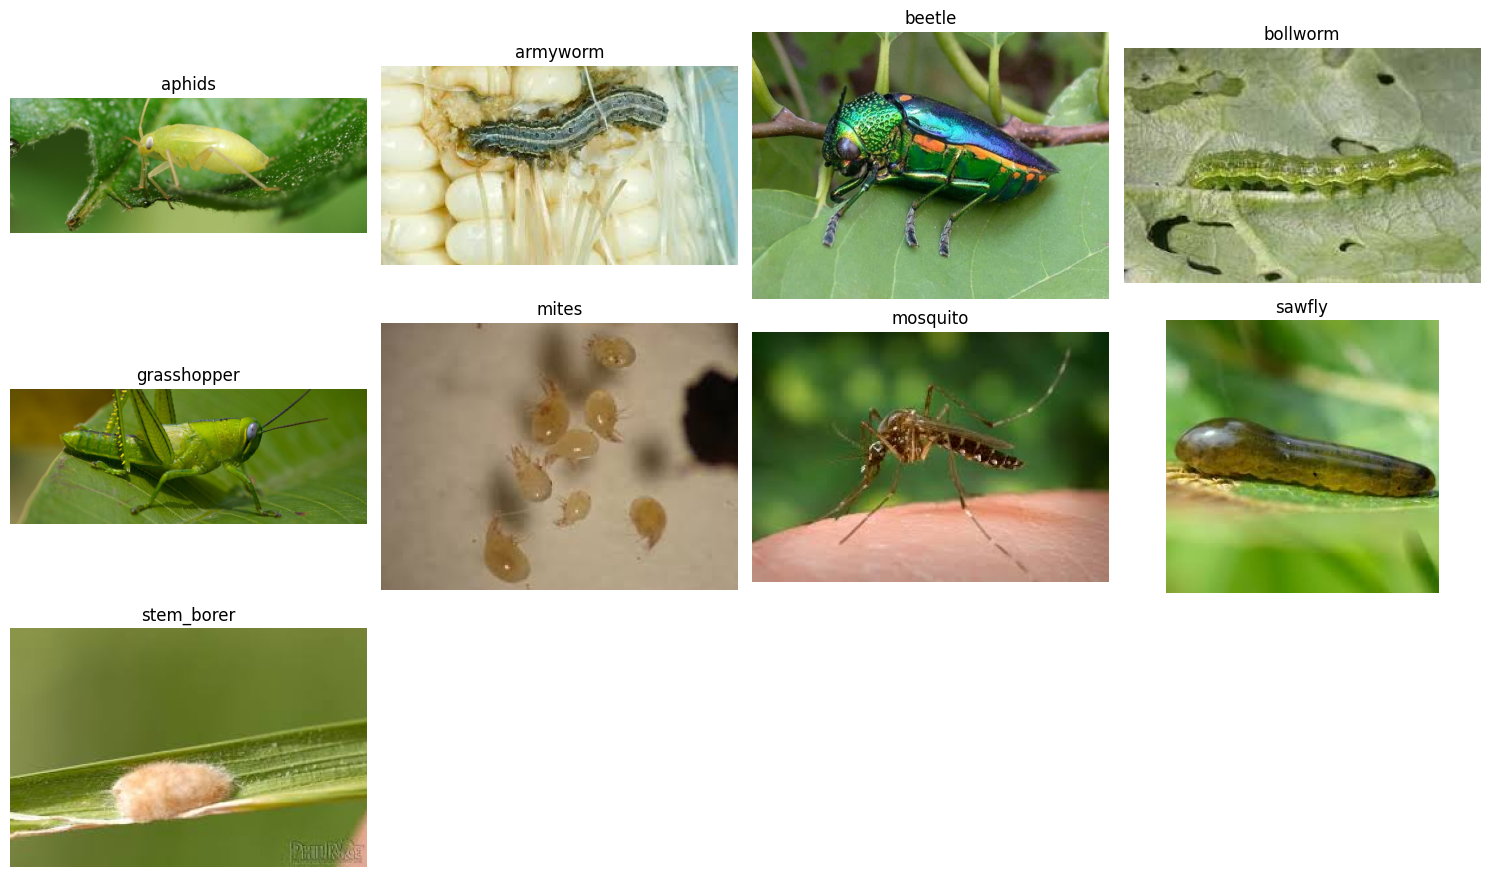

In [6]:
visualise(train_path)

In [7]:
def count_images(directory):
    image_count = {}
    for class_folder in os.listdir(directory):
        class_path = os.path.join(directory, class_folder)
        if os.path.isdir(class_path):
            image_count[class_folder] = len([f for f in os.listdir(class_path) if f.endswith(('.jpg', '.png', '.jpeg'))])
    return image_count

In [8]:
train_counts = count_images(train_path)
test_counts = count_images(test_path)

def print_counts(counts):
    for class_name, count in counts.items():
        print(f'{class_name}: {count}')


print("Train Counts:")
print_counts(train_counts)

print()

print("Test Counts:")
print_counts(test_counts)

Train Counts:
aphids: 266
armyworm: 223
beetle: 291
bollworm: 245
grasshopper: 277
mites: 254
mosquito: 295
sawfly: 200
stem_borer: 181

Test Counts:
aphids: 44
armyworm: 43
beetle: 50
bollworm: 36
grasshopper: 46
mites: 42
mosquito: 50
sawfly: 37
stem_borer: 36


In [9]:
def check_corrupted_images(dir):
  sub_dir = [d for d in os.listdir(dir)]
  for dir in sub_dir:
    class_path = os.path.join(train_path, dir)
    image_files = [f for f in os.listdir(class_path)]
    for image in image_files:
      image = os.path.join(class_path, image)
      try:
          with Image.open(image) as img:
              img.verify()
      except (IOError, SyntaxError) as e:
          os.remove(image)
          print(f"Removed corrupted image: {image}")
  print("No corrupted images found.")

check_corrupted_images(train_path)
check_corrupted_images(test_path)

No corrupted images found.
No corrupted images found.


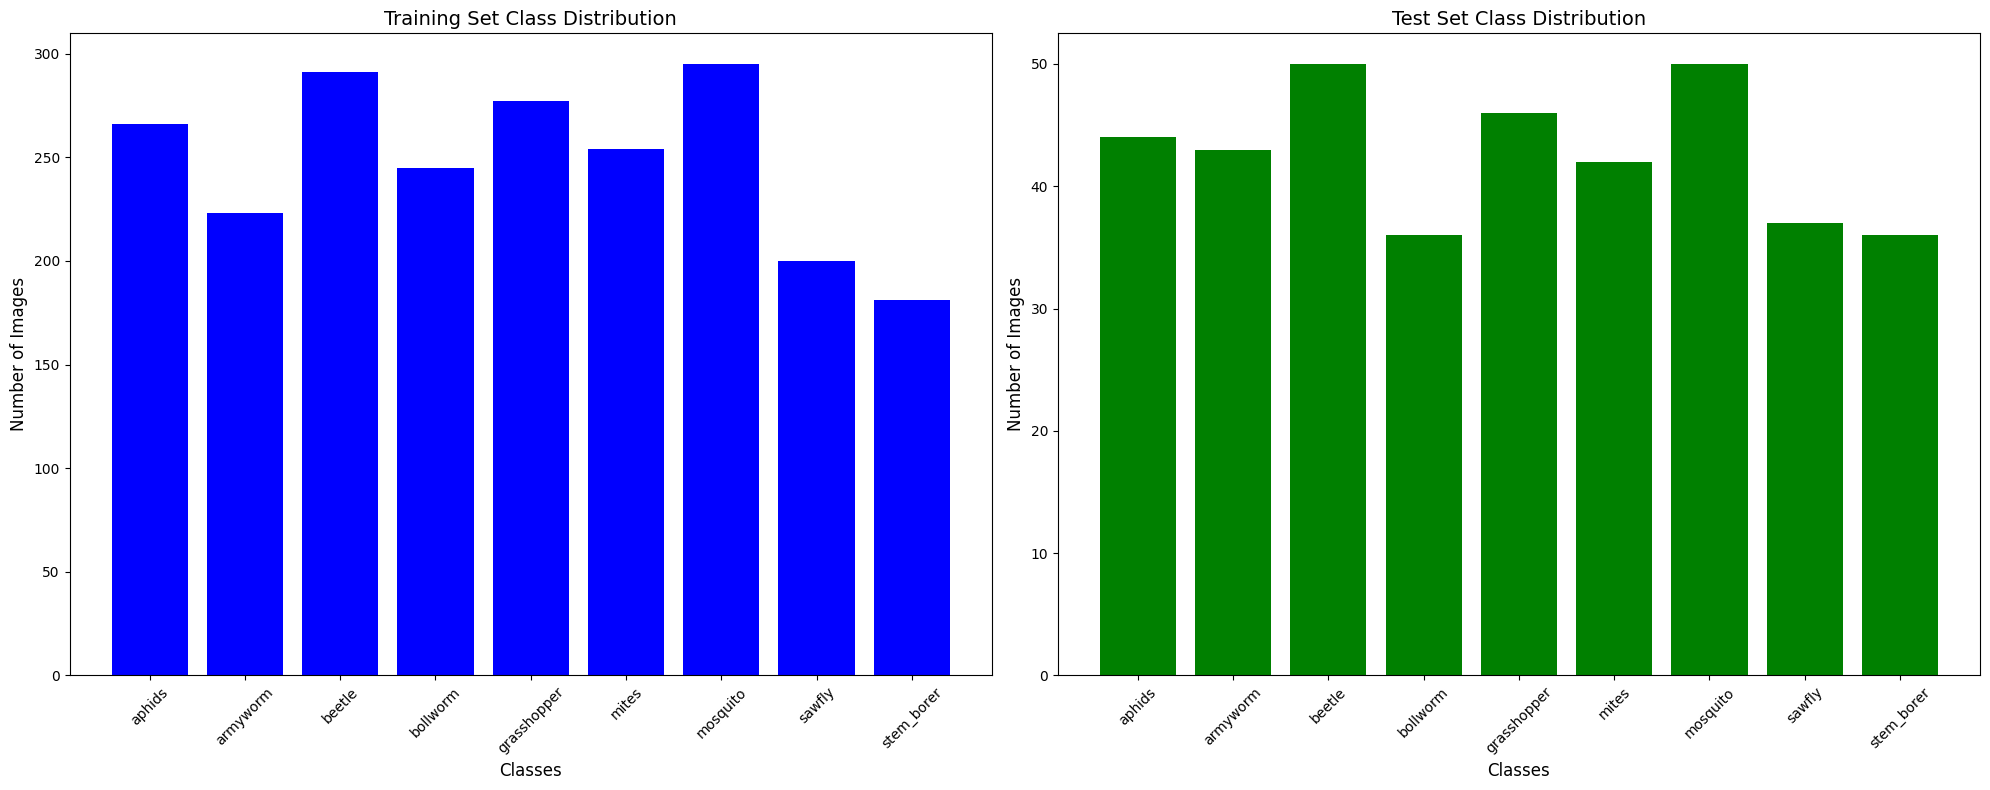

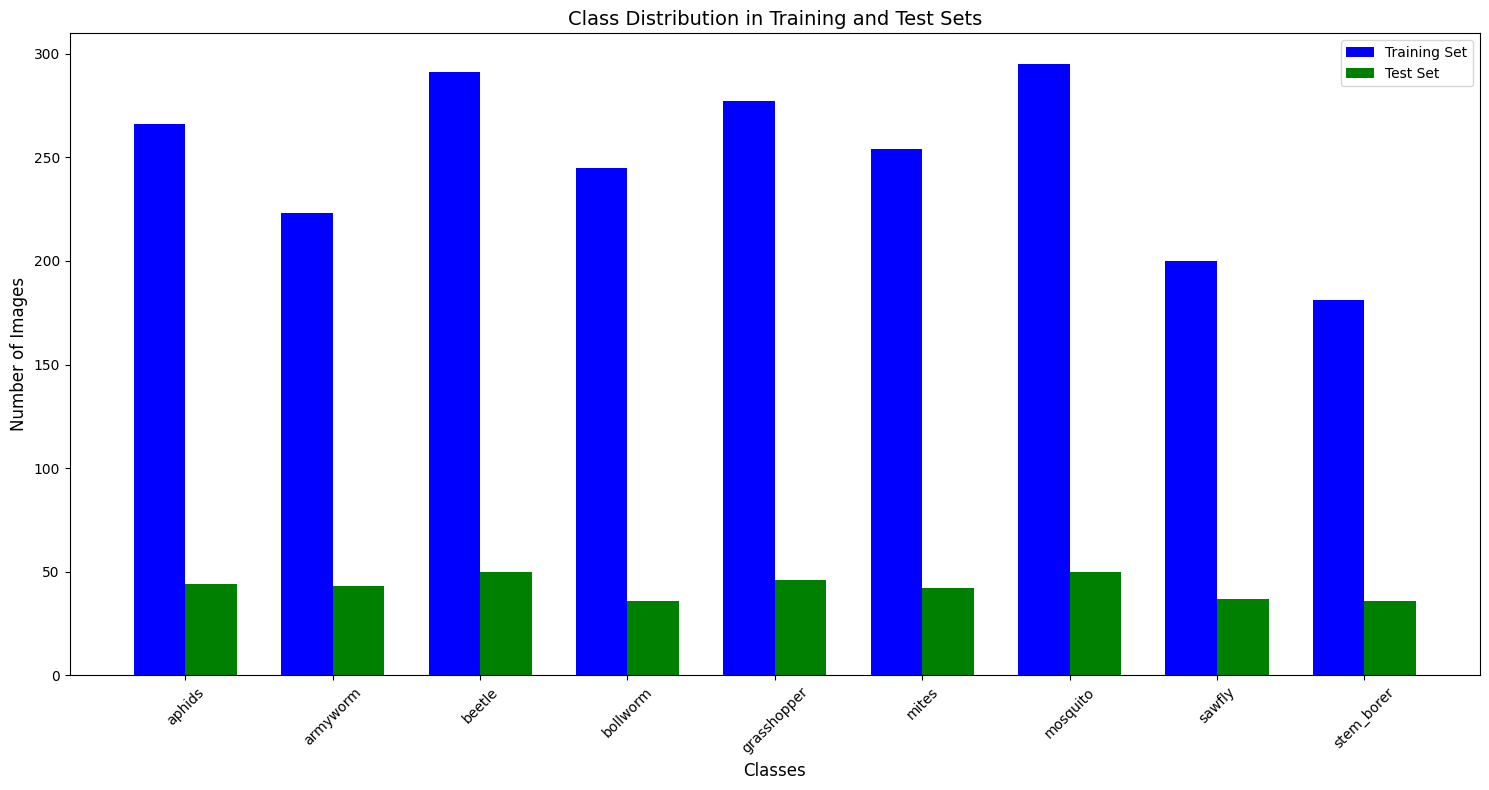

In [10]:
def plot_class_distribution():
    all_classes = sorted(set(list(train_counts.keys()) + list(test_counts.keys())))

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

    train_values = [train_counts.get(cls, 0) for cls in all_classes]
    ax1.bar(all_classes, train_values, color='blue')
    ax1.set_title('Training Set Class Distribution', fontsize=14)
    ax1.set_xlabel('Classes', fontsize=12)
    ax1.set_ylabel('Number of Images', fontsize=12)
    ax1.tick_params(axis='x', rotation=45)

    test_values = [test_counts.get(cls, 0) for cls in all_classes]
    ax2.bar(all_classes, test_values, color='green')
    ax2.set_title('Test Set Class Distribution', fontsize=14)
    ax2.set_xlabel('Classes', fontsize=12)
    ax2.set_ylabel('Number of Images', fontsize=12)
    ax2.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

plot_class_distribution()

def plot_combined_class_distribution():
    all_classes = sorted(set(list(train_counts.keys()) + list(test_counts.keys())))

    bar_width = 0.35

    r1 = np.arange(len(all_classes))
    r2 = [x + bar_width for x in r1]

    plt.figure(figsize=(15, 8))

    train_values = [train_counts.get(cls, 0) for cls in all_classes]
    test_values = [test_counts.get(cls, 0) for cls in all_classes]

    plt.bar(r1, train_values, width=bar_width, label='Training Set', color='blue')
    plt.bar(r2, test_values, width=bar_width, label='Test Set', color='green')

    plt.xlabel('Classes', fontsize=12)
    plt.ylabel('Number of Images', fontsize=12)
    plt.title('Class Distribution in Training and Test Sets', fontsize=14)
    plt.xticks([r + bar_width/2 for r in range(len(all_classes))], all_classes, rotation=45)

    plt.legend()

    plt.tight_layout()
    plt.show()

plot_combined_class_distribution()

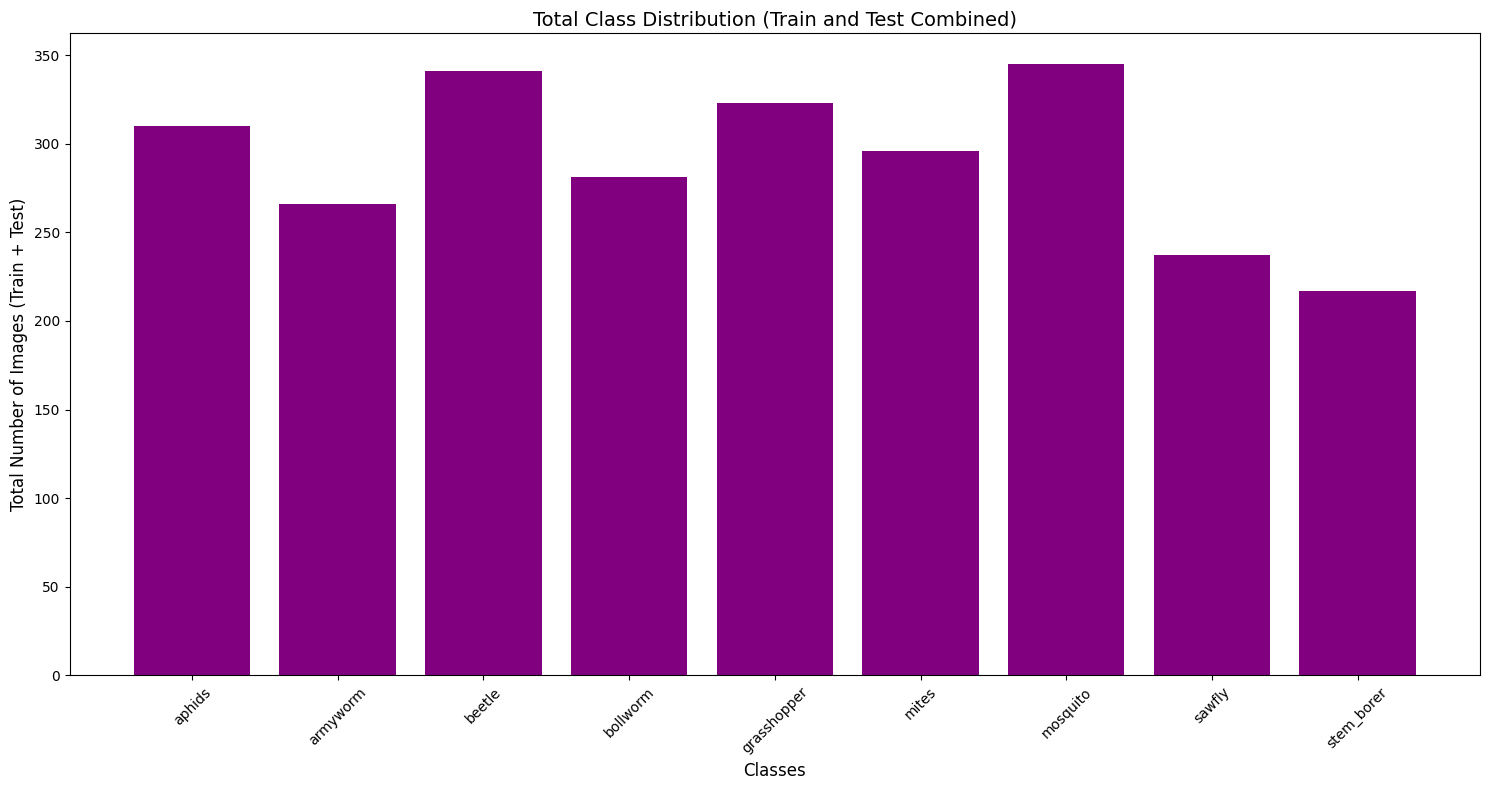

In [11]:
def plot_total_class_distribution():
    all_classes = sorted(set(list(train_counts.keys()) + list(test_counts.keys())))

    plt.figure(figsize=(15, 8))

    total_values = [train_counts.get(cls, 0) + test_counts.get(cls, 0) for cls in all_classes]

    plt.bar(all_classes, total_values, color='purple')

    plt.xlabel('Classes', fontsize=12)
    plt.ylabel('Total Number of Images (Train + Test)', fontsize=12)
    plt.title('Total Class Distribution (Train and Test Combined)', fontsize=14)
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

plot_total_class_distribution()

Overall Image Dimension Statistics:
Width - Min: 180, Max: 2500, Mean: 359.47, Median: 275.0
Height - Min: 121, Max: 3088, Mean: 254.52, Median: 191.0


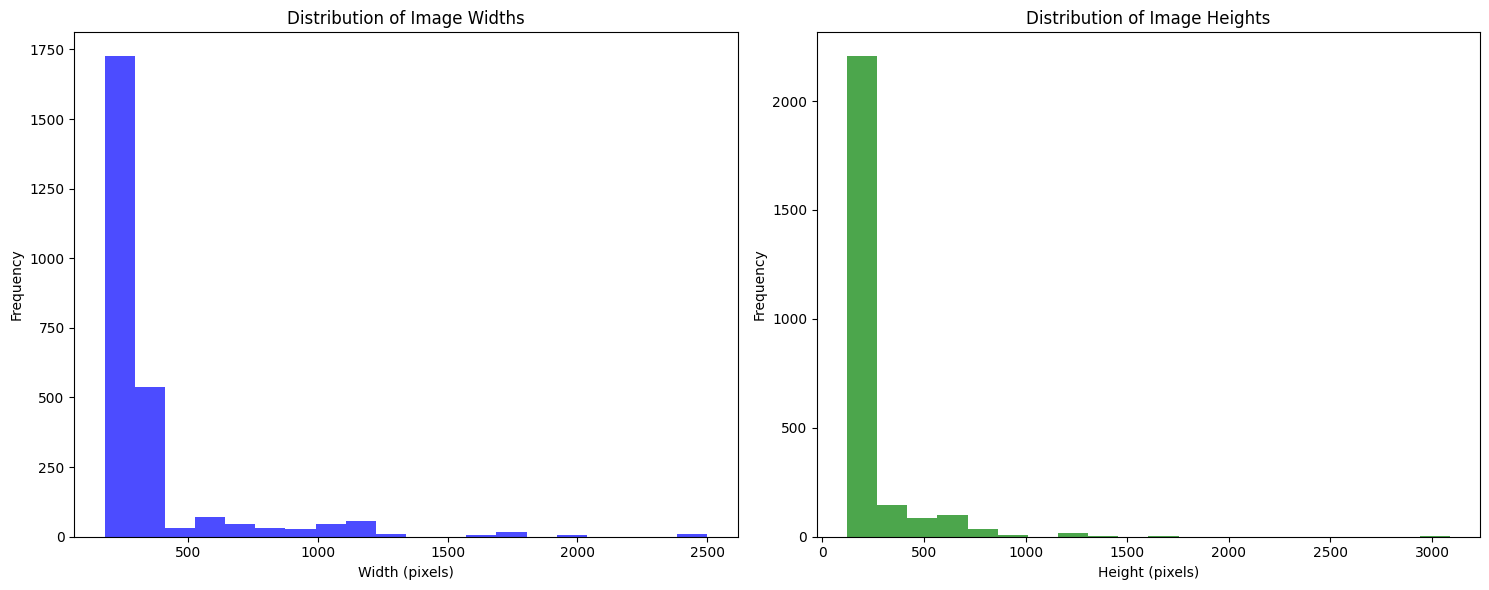

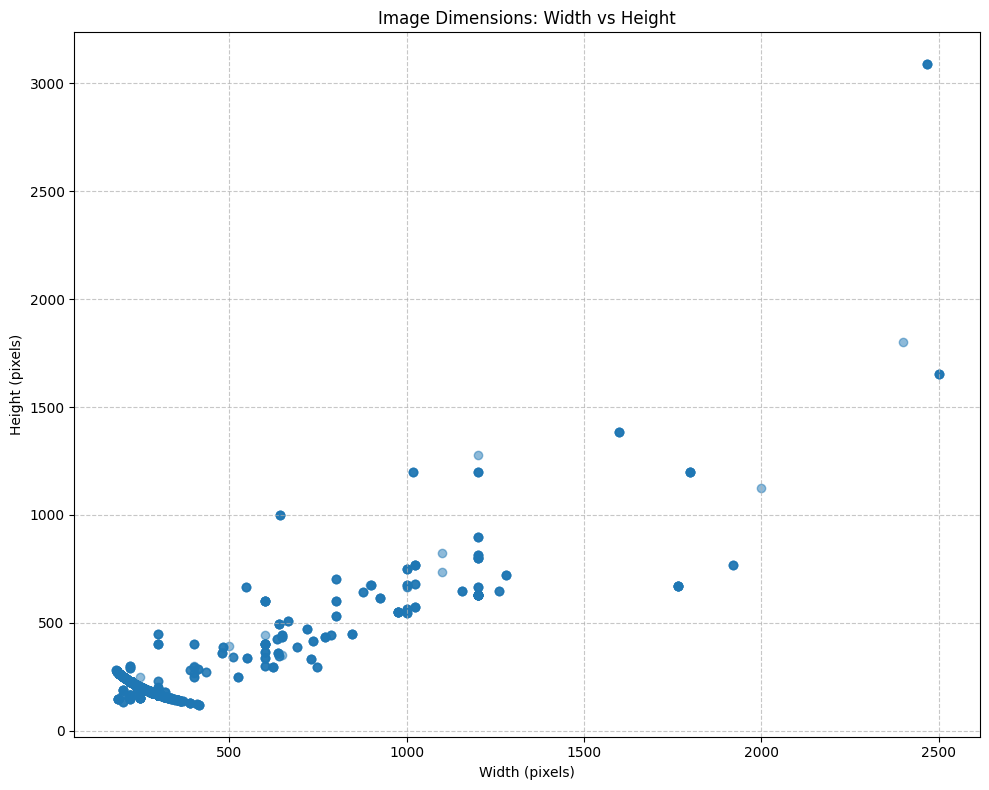

C:\Users\londonreturns\AppData\Local\Temp\ipykernel_9056\1829049620.py:64: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(class_widths, labels=class_names)
C:\Users\londonreturns\AppData\Local\Temp\ipykernel_9056\1829049620.py:70: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(class_heights, labels=class_names)


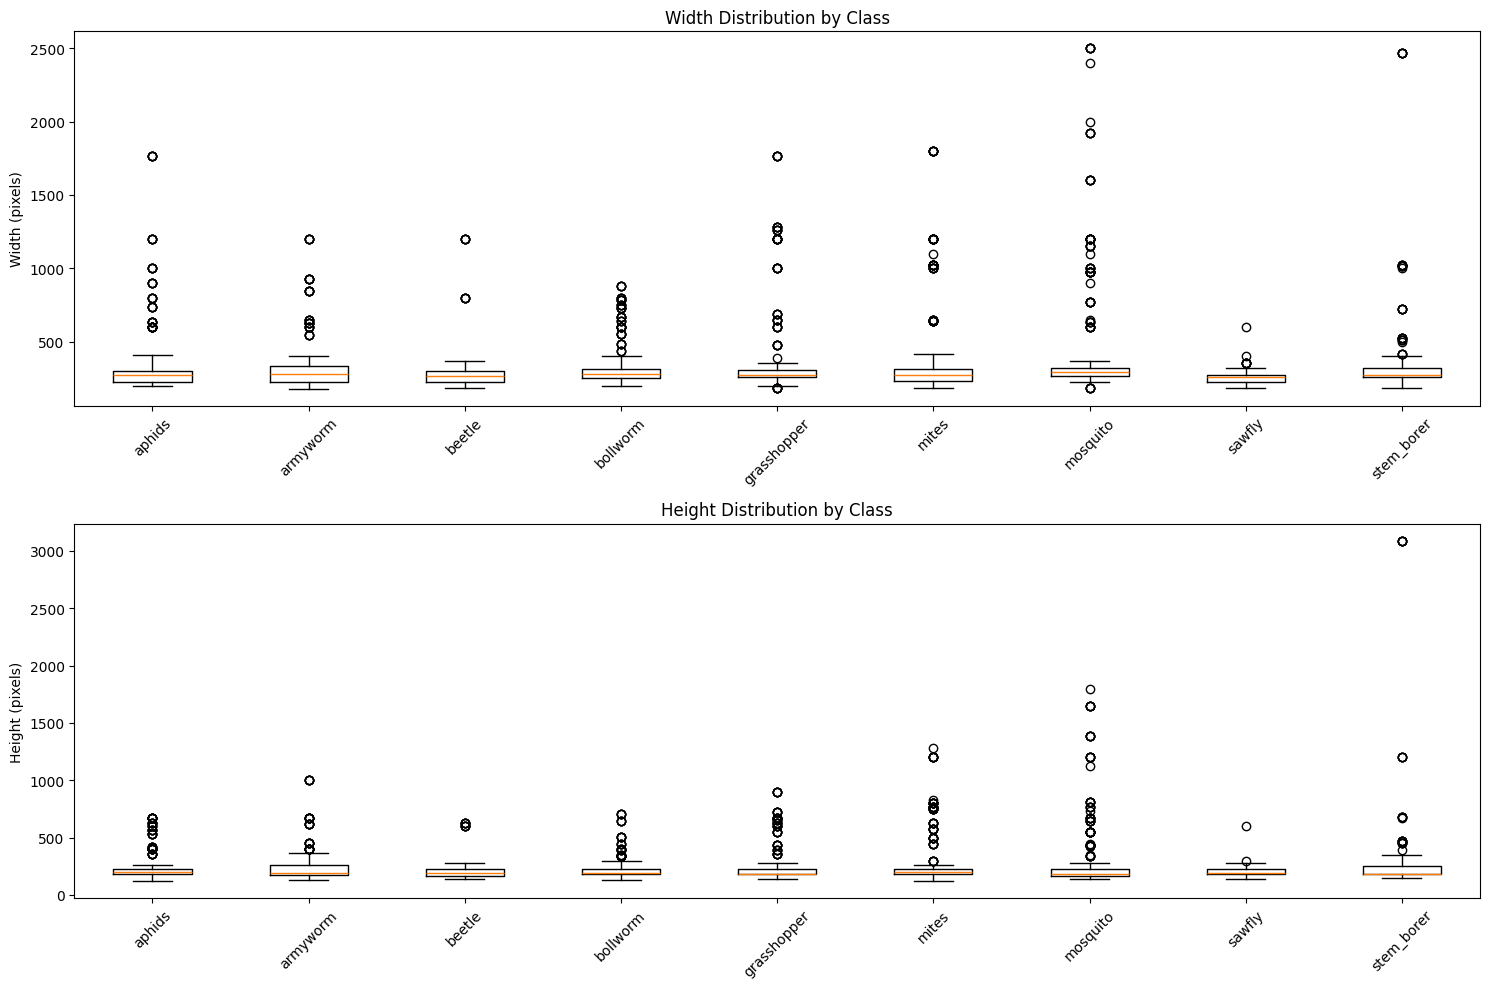

In [12]:
def analyze_image_dimensions():
    widths = []
    heights = []
    class_dimensions = {}

    for dataset_path in [train_path, test_path]:
        for class_name in os.listdir(dataset_path):
            class_path = os.path.join(dataset_path, class_name)
            if not os.path.isdir(class_path):
                continue

            if class_name not in class_dimensions:
                class_dimensions[class_name] = {'widths': [], 'heights': []}

            for img_file in os.listdir(class_path):
                img_path = os.path.join(class_path, img_file)
                try:
                    with Image.open(img_path) as img:
                        width, height = img.size
                        widths.append(width)
                        heights.append(height)
                        class_dimensions[class_name]['widths'].append(width)
                        class_dimensions[class_name]['heights'].append(height)
                except Exception as e:
                    print(f"Error processing {img_path}: {e}")

    print("Overall Image Dimension Statistics:")
    print(f"Width - Min: {min(widths)}, Max: {max(widths)}, Mean: {np.mean(widths):.2f}, Median: {np.median(widths)}")
    print(f"Height - Min: {min(heights)}, Max: {max(heights)}, Mean: {np.mean(heights):.2f}, Median: {np.median(heights)}")

    plt.figure(figsize=(15, 6))

    plt.subplot(1, 2, 1)
    plt.hist(widths, bins=20, color='blue', alpha=0.7)
    plt.title('Distribution of Image Widths')
    plt.xlabel('Width (pixels)')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.hist(heights, bins=20, color='green', alpha=0.7)
    plt.title('Distribution of Image Heights')
    plt.xlabel('Height (pixels)')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 8))
    plt.scatter(widths, heights, alpha=0.5)
    plt.title('Image Dimensions: Width vs Height')
    plt.xlabel('Width (pixels)')
    plt.ylabel('Height (pixels)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(15, 10))

    class_names = list(class_dimensions.keys())
    class_widths = [class_dimensions[cls]['widths'] for cls in class_names]
    class_heights = [class_dimensions[cls]['heights'] for cls in class_names]

    plt.subplot(2, 1, 1)
    plt.boxplot(class_widths, labels=class_names)
    plt.title('Width Distribution by Class')
    plt.ylabel('Width (pixels)')
    plt.xticks(rotation=45)

    plt.subplot(2, 1, 2)
    plt.boxplot(class_heights, labels=class_names)
    plt.title('Height Distribution by Class')
    plt.ylabel('Height (pixels)')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

analyze_image_dimensions()

In [13]:
def create_validation_split(train_dir, val_dir, val_size=0.2):
    Path(val_dir).mkdir(parents=True, exist_ok=True)

    for class_name in os.listdir(train_dir):
        class_path = Path(train_dir) / class_name
        if class_path.is_dir():
            img_paths = [class_path / img_name for img_name in os.listdir(class_path)]

            train_paths, val_paths = train_test_split(
                img_paths, test_size=val_size, random_state=42
            )

            val_class_path = Path(val_dir) / class_name
            val_class_path.mkdir(parents=True, exist_ok=True)

            for val_img in val_paths:
                shutil.move(str(val_img), str(val_class_path / val_img.name))

create_validation_split(train_path, val_path, val_size=0.2)

In [14]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import numpy as np

input_base_dir = 'data\\pest'
output_base_dir = 'data\\augmented_images\\pest'

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1./255
)

# First ensure validation split is done
# Note: The validation split is already done above at line 299: create_validation_split(train_path, val_path, val_size=0.2)

# Counter for processed images
total_processed = 0
total_augmented = 0

# Process each dataset directory separately to respect the validation split
for dataset_dir in ['train', 'val', 'test']:
    dataset_path = os.path.join(input_base_dir, dataset_dir)

    # Skip if the directory doesn't exist
    if not os.path.exists(dataset_path):
        print(f"Skipping {dataset_dir} directory as it doesn't exist")
        continue

    print(f"Processing {dataset_dir} dataset")

    for class_dir in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_dir)

        # Skip if not a directory
        if not os.path.isdir(class_path):
            continue

        # Create output directory for this class
        output_dir = os.path.join(output_base_dir, dataset_dir, class_dir)
        os.makedirs(output_dir, exist_ok=True)

        print(f"Processing directory: {dataset_dir}/{class_dir}")

        # Get all image files in this class directory
        image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif'))]

        for idx, filename in enumerate(image_files):
            if idx % 10 == 0:
                print(f"  Processing image {idx+1}/{len(image_files)} in {dataset_dir}/{class_dir}")

            image_path = os.path.join(class_path, filename)

            # Get filename without extension
            file_basename = os.path.splitext(filename)[0]

            try:
                # Load and resize image
                img = image.load_img(image_path)
                img_array = image.img_to_array(img)
                img_resized = tf.image.resize(img_array, (256, 256))
                img_resized_np = img_resized.numpy().astype('uint8')

                # Save the resized original image
                original_output_path = os.path.join(output_dir, f"{file_basename}_original.jpg")
                Image.fromarray(img_resized_np).save(original_output_path, quality=95)
                total_processed += 1

                # Create a figure for visualization (optional)
                plt.figure(figsize=(6, 6))
                plt.subplot(3, 3, 1)
                plt.imshow(img_resized_np)
                plt.title("Original Image")
                plt.axis('off')

                # Generate and save augmented images
                img_resized = tf.expand_dims(img_resized, axis=0)
                augmented_images = datagen.flow(img_resized, batch_size=1)

                for i in range(2, 10):
                    # Get next augmented image
                    augmented_image = next(augmented_images)[0]

                    # Convert from float [0,1] to uint8 [0,255]
                    augmented_image_uint8 = (augmented_image * 255).astype('uint8')

                    # Save the augmented image
                    aug_output_path = os.path.join(output_dir, f"{file_basename}_aug_{i-1}.jpg")
                    Image.fromarray(augmented_image_uint8).save(aug_output_path, quality=95)
                    total_augmented += 1

                    # Add to visualization (optional)
                    plt.subplot(3, 3, i)
                    plt.imshow(augmented_image_uint8)
                    plt.title(f"Augmentation {i-1}")
                    plt.axis('off')

                # Show the visualization (comment this out to process faster)
                # plt.show()
                plt.close()

            except Exception as e:
                print(f"Error processing {image_path}: {e}")

print(f"Processing complete! Saved {total_processed} original images and {total_augmented} augmented images.")
print(f"Total images saved: {total_processed + total_augmented}")


Processing train dataset
Processing directory: train/aphids
  Processing image 1/212 in train/aphids
  Processing image 11/212 in train/aphids
  Processing image 21/212 in train/aphids
  Processing image 31/212 in train/aphids
  Processing image 41/212 in train/aphids
  Processing image 51/212 in train/aphids
  Processing image 61/212 in train/aphids
  Processing image 71/212 in train/aphids
  Processing image 81/212 in train/aphids
  Processing image 91/212 in train/aphids
  Processing image 101/212 in train/aphids
  Processing image 111/212 in train/aphids
  Processing image 121/212 in train/aphids
  Processing image 131/212 in train/aphids
  Processing image 141/212 in train/aphids
  Processing image 151/212 in train/aphids
  Processing image 161/212 in train/aphids
  Processing image 171/212 in train/aphids
  Processing image 181/212 in train/aphids
  Processing image 191/212 in train/aphids
  Processing image 201/212 in train/aphids
  Processing image 211/212 in train/aphids
Proce